a) Filtro de Desenfoque (Blur)

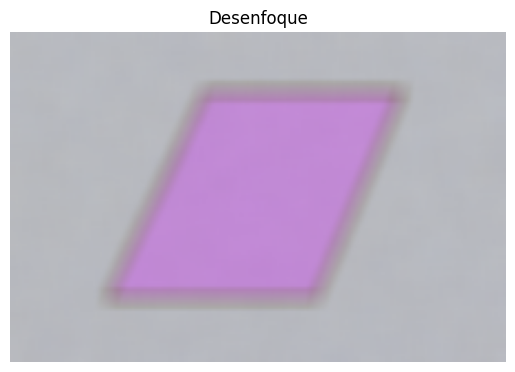

True

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Cargar la imagen 
image = cv2.imread('data/Input/romboide-sucio.png', cv2.COLOR_RGB2BGR)

# Aplcar flitro de desenfoque blur
blur = cv2.blur(image, (10, 10))


plt.title('Desenfoque')
plt.imshow(blur)
plt.axis('off') 
plt.show()


# Guardar la imagen blur
cv2.imwrite("data/generated/romboide-desenfocado-blur.jpg", blur)

b) Filtro de Desenfoque Gaussiano (GaussianBlur)

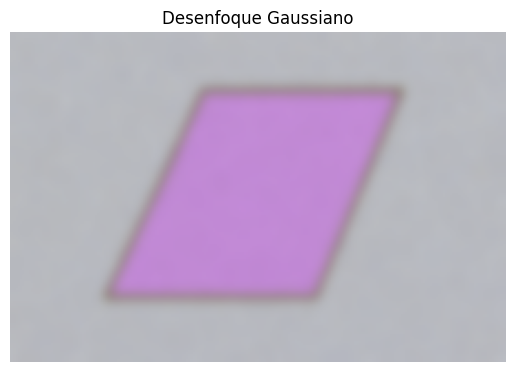

True

In [4]:
import cv2

gassian = cv2.GaussianBlur(image, (15, 15), 0)


plt.title('Desenfoque Gaussiano')
plt.imshow(gassian)
plt.axis('off')  # Ocultar los ejes
plt.show()

# Guardar la imagen blur
cv2.imwrite("data/generated/romboide-desenfocado-Gaussiano.jpg", gassian)

c) Filto de Nítidez  (Sharpen)

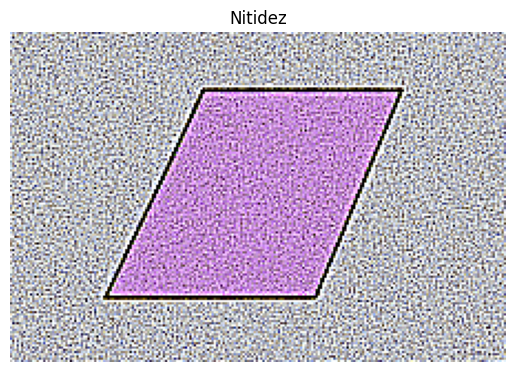

True

In [9]:
import cv2
import numpy as np

sharper_kernel= np.array([  [-1, -1, -1],
                            [-1,  9, -1],
                            [-1, -1, -1]])

sharper = cv2.filter2D(image, -1, sharper_kernel)

plt.title('Nitidez')
plt.imshow(sharper)
plt.axis('off')  # Ocultar los ejes
plt.show()

# Guardar la imagen nitidez
cv2.imwrite("data/generated/romboide-nitidez.jpg", sharper)


d) Filtro de Contoernoes

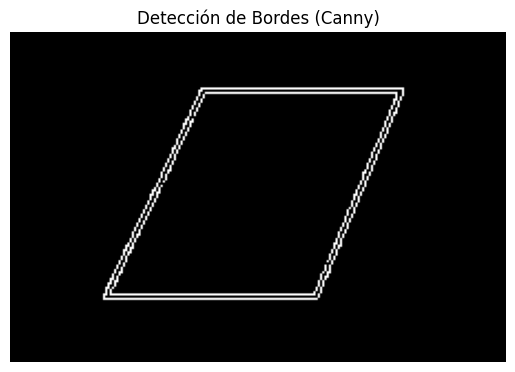

True

In [5]:
import cv2
import matplotlib.pyplot as plt


# Cargar la imagen en escala de grises
image = cv2.imread('data/Input/romboide-sucio.png', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro de detección de bordes (Canny)
edges = cv2.Canny(image, 100, 200)

plt.title('Detección de Bordes (Canny)')
plt.imshow(edges , cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Guardar la imagen filtrada
cv2.imwrite('data/generated/romboide_bordes.jpg', edges)

e) Filtro de Emboss (Relieve) 

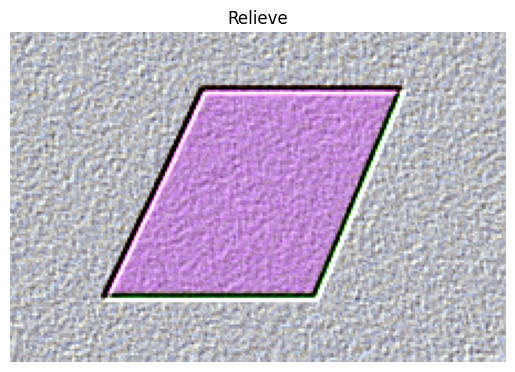

True

In [11]:
import cv2
import numpy as np



# Crear un kernel para el filtro de relieve
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Aplicar el filtro de relieve
embossed_image = cv2.filter2D(image, -1, emboss_kernel)



# Guardar la imagen filtrada
cv2.imwrite('imagen_relieve.jpg', embossed_image)

plt.title('Relieve')
plt.imshow(embossed_image)
plt.axis('off')  # Ocultar los ejes
plt.show()


# Guardar la imagen filtrada
cv2.imwrite('data/generated/romboide_Relieve.jpg', embossed_image)

g) Filtro de Dilatación 

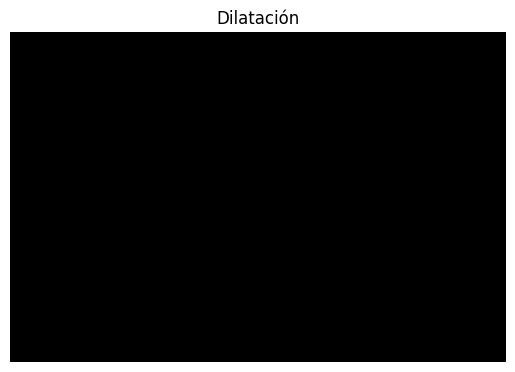

True

In [22]:
import cv2
import numpy as np

# Cargar la imagen en escala de grises
image = cv2.imread('data/Input/romboide-sucio.png', cv2.IMREAD_GRAYSCALE)

# Umbralizar la imagen para obtener una imagen binaria
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Crear un kernel para la dilatación
kernel = np.ones((5, 5), np.uint8)

# Aplicar el filtro de dilatación
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)




plt.title('Dilatación')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Guardar la imagen filtrada
cv2.imwrite('data/generated/romboide_dilatado.jpg', dilated_image)


In [2]:
# Calcular área y perímetro de todas las imágenes procesadas y guardar en Excel
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

# Carpeta con imágenes procesadas
processed_folder = 'data/generated/'

# Listar imágenes procesadas
image_files = [f for f in os.listdir(processed_folder) if f.endswith('.jpg') or f.endswith('.png')]


# Lista para almacenar resultados
results = []

for img_name in image_files:
    img_path = os.path.join(processed_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    # Binarizar la imagen para encontrar contornos
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Encontrar contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Tomar el contorno más grande
        c = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
    else:
        area = 0
        perimeter = 0

    results.append({'Imagen': img_name, 'Área': area, 'Perímetro': perimeter})

# Guardar resultados en Excel
df = pd.DataFrame(results)
df.to_excel('resultados_romboide.xlsx', index=False)

# Mostrar resultados
print(df)

                                 Imagen      Área    Perímetro
0                      romboide-and.jpg   33004.0   742.000000
1               romboide-binarizado.jpg   33004.0   742.000000
2         romboide-desenfocado-blur.jpg   33004.0   742.000000
3    romboide-desenfocado-Gaussiano.jpg   33004.0   742.000000
4                 romboide-division.jpg       0.0     0.000000
5                     romboide-gris.jpg   33004.0   742.000000
6   romboide-interpolacion-bilinear.jpg  159201.0  1596.000000
7     romboide-interpolacion-vecino.jpg  159201.0  1596.000000
8           romboide-multiplicacion.jpg   33004.0   742.000000
9                  romboide-nitidez.jpg   32870.0   844.499562
10                    romboide-not1.jpg    8792.5   420.634557
11                    romboide-not2.jpg   21497.0   618.994948
12                      romboide-or.jpg   33004.0   742.000000
13          romboide-redimensionada.jpg  159201.0  1596.000000
14                   romboide-resta.jpg       0.0     0